In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.special import legendre
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from numpy import exp,arange
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def read_data(name):
    f = open(name)
    fx = []
    denv = []
    for i in f:
        fx.append(float(i.split()[0]))
        denv.append(float(i.split()[2]))
    return fx, denv

fx, denv0 = read_data('density0.txt')
fx, denv1 = read_data('density1.txt')
fx, denv2 = read_data('density2.txt')
fx, denv3 = read_data('density3.txt')

f0 = interp1d(fx, denv0)
f1 = interp1d(fx, denv1)
f2 = interp1d(fx, denv2)
f3 = interp1d(fx, denv3)

def Catisen_to_Sphere(x, z):
    r = np.sqrt(x**2 + z**2)
    Costheta = z / r
    return r, Costheta

In [17]:
def get_density(x, z):
    r, Cos = Catisen_to_Sphere(x, z)
    a = 0
#     a = f0(r) * legendre(0)(Cos)
    b = 0
    b = f1(r) * legendre(1)(Cos)
    c = f2(r) * legendre(2)(Cos)
    d = f3(r) * legendre(3)(Cos)
#     return a
    return a + b + c + d
    
    

In [18]:
x = arange(-5,5,0.1)
z = arange(-5,5,0.1)
X,Z = meshgrid(x, z)
FF = get_density(X, Z)

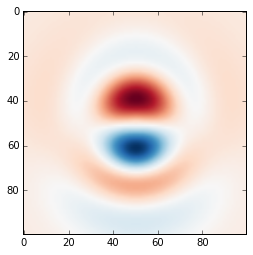

In [19]:
im = imshow(FF,cmap=cm.RdBu) # drawing the function


In [6]:
FF[10,0]

0.00027094361565743275

In [8]:
FF[0,10]

0.00052270890989780812

/Users/junjieyang/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


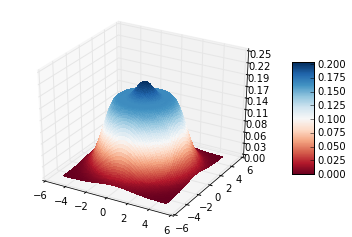

In [9]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Z, FF, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

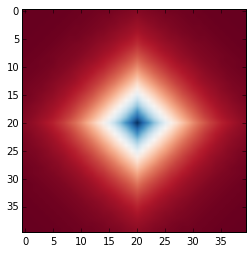

In [128]:
x = np.concatenate((arange(-5,-3,0.1), arange(3,5,0.1)))
z = np.concatenate((arange(-5,-3,0.1), arange(3,5,0.1)))
X,Z = meshgrid(x, z)
FF = get_density(X, Z)
im = imshow(FF,cmap=cm.RdBu) # drawing the function



In [125]:
FF[3,5]

0.014291541824647362

In [126]:
FF[5,3]

0.014306741148853854